In [2]:
import os 
os.chdir("../..")

In [4]:
import numpy as np
#from detectron2.structures import BoxMode
import cv2
import matplotlib.pyplot as plt


from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from src.utils.dataset import register_detectron2_multipart_datasets, get_splits_for_multipart_dataset
# from src.utils.training import get_splits_for_multipart_dataset

import tqdm

In [5]:
!ls data/training/RGBN

lubsko		swiebodzin  torzym		       zagan
sulechow_slawa	szprotawa   train_val_test_splits.pkl


In [6]:
base_path = "data/training/RGBN/"
train_val_maps = ["szprotawa", "swiebodzin", "lubsko", "zagan", "torzym"]
test_maps = ["sulechow_slawa"]

In [7]:
splits = get_splits_for_multipart_dataset(base_path, train_val_maps, test_maps)

Reusing existing splits_file


In [8]:
register_detectron2_multipart_datasets("sick_trees", 
                                       {m: base_path + m for m in train_val_maps},
                                       splits, min_bbox_area=200)

In [7]:
meta = MetadataCatalog.get('sick_trees_train')

In [9]:
%%time
train_dataset_dicts = DatasetCatalog.get("sick_trees_train")
len(train_dataset_dicts)

CPU times: user 12.6 s, sys: 0 ns, total: 12.6 s
Wall time: 12.6 s


22076

In [9]:
%%time
val_dataset_dicts = DatasetCatalog.get("sick_trees_val")
len(val_dataset_dicts)

CPU times: user 3.73 s, sys: 4.11 ms, total: 3.73 s
Wall time: 3.73 s


5504

In [10]:
means = {c: [] for c in "rgbn"}
stds = {c: [] for c in "rgbn"}

for d in tqdm.notebook.tqdm(train_dataset_dicts):
    im = cv2.imread(d["file_name"], cv2.IMREAD_UNCHANGED)
    for i, c in enumerate("rgbn"):
        means[c].append(im[:,:,i].mean())
        stds[c].append(im[:,:,i].std())
    
# print("mean of means: ", np.mean(ndvi_means))
# print("mean of stds:  ", np.mean(ndvi_stds))
# print("std of means:  ", np.std(ndvi_means))
for c in "rgbn":
    print(c, "mean: ", np.mean(means[c]))
    print(c, "std: ", np.mean(stds[c]))


r mean:  68.60176277048289
r std:  25.05072945688351
g mean:  90.37255792238817
g std:  22.96708310183466
b mean:  99.04053918695983
b std:  13.27640256812483
n mean:  187.12327778336686
n std:  10.55706656507702


In [11]:
# print("std of stds:  ", np.std(ndvi_stds))

std of stds:   6.853606558543485


In [11]:
[np.mean(means[c]) for c in "rgbn"]

[68.60176277048289, 90.37255792238817, 99.04053918695983, 187.12327778336686]

In [12]:
[np.mean(stds[c]) for c in "rgbn"]

[25.05072945688351, 22.96708310183466, 13.27640256812483, 10.55706656507702]

In [10]:
def area(args):
    return (args[2] - args[0]) * (args[3] - args[1])

In [11]:
areas = []
for d in train_dataset_dicts:
    for ann in d['annotations']:
        areas.append(area(ann['bbox']))

In [16]:
np.quantile(areas, 0.15)

432.0

In [17]:
def aspect_ratio(args):
    dim_1 = (args[2] - args[0])
    dim_2 = (args[3] - args[1])
    return min(dim_1, dim_2) / max(dim_1, dim_2)

In [18]:
ratios = []
for d in train_dataset_dicts:
    for ann in d['annotations']:
        ratios.append(aspect_ratio(ann['bbox']))

(array([  10.,    9.,   27.,   41.,   31.,   32.,   66.,   77.,   91.,
         117.,  137.,  182.,  140.,  172.,  165.,  197.,  213.,  261.,
         287.,  308.,  314.,  339.,  342.,  323.,  352.,  481.,  435.,
         525.,  544.,  574.,  580.,  731.,  742.,  708.,  791.,  821.,
         821.,  961., 1032.,  869., 1018., 1115., 1079., 1074., 1214.,
        1168., 1171., 1184., 1174., 1012.]),
 array([0.02836879, 0.04780142, 0.06723404, 0.08666667, 0.10609929,
        0.12553191, 0.14496454, 0.16439716, 0.18382979, 0.20326241,
        0.22269504, 0.24212766, 0.26156028, 0.28099291, 0.30042553,
        0.31985816, 0.33929078, 0.3587234 , 0.37815603, 0.39758865,
        0.41702128, 0.4364539 , 0.45588652, 0.47531915, 0.49475177,
        0.5141844 , 0.53361702, 0.55304965, 0.57248227, 0.59191489,
        0.61134752, 0.63078014, 0.65021277, 0.66964539, 0.68907801,
        0.70851064, 0.72794326, 0.74737589, 0.76680851, 0.78624113,
        0.80567376, 0.82510638, 0.84453901, 0.86397163, 

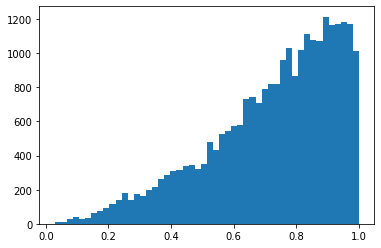

In [20]:
plt.hist(ratios, bins=50)

In [33]:
np.quantile(areas, 0.13)

403.0

In [34]:
np.median(areas)

936.0

In [35]:
np.mean(areas)

2639.288175922017

In [21]:
import shapely as shp

0.25


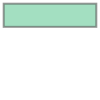

In [69]:
xyxy = [0, 0, 40, 10]
print(aspect_ratio(xyxy))
shp.geometry.box(*xyxy)

In [29]:
np.quantile(ratios, 0.05)

0.32000000000000006

In [40]:
ratios_area = []
for d in train_dataset_dicts:
    for ann in d['annotations']:
        if area(ann["bbox"])<400:
            ratios_area.append(aspect_ratio(ann['bbox']))

(array([  6.,  10.,  13.,  13.,   8.,  16.,  22.,  30.,  40.,  41.,  74.,
         63.,  26.,  76.,  62.,  65.,  58.,  82.,  62.,  67.,  38., 109.,
         58.,  83.,  43.,  73.,  66.,  93.,  79.,  50.,  63.,  94.,  53.,
         55.,  83.,  89., 110.,  52.,  75.,  50., 154.,  79., 140.,  58.,
        177.,  88.,  95., 172.,   0., 103.]),
 array([0.04081633, 0.06      , 0.07918367, 0.09836735, 0.11755102,
        0.13673469, 0.15591837, 0.17510204, 0.19428571, 0.21346939,
        0.23265306, 0.25183673, 0.27102041, 0.29020408, 0.30938776,
        0.32857143, 0.3477551 , 0.36693878, 0.38612245, 0.40530612,
        0.4244898 , 0.44367347, 0.46285714, 0.48204082, 0.50122449,
        0.52040816, 0.53959184, 0.55877551, 0.57795918, 0.59714286,
        0.61632653, 0.6355102 , 0.65469388, 0.67387755, 0.69306122,
        0.7122449 , 0.73142857, 0.75061224, 0.76979592, 0.78897959,
        0.80816327, 0.82734694, 0.84653061, 0.86571429, 0.88489796,
        0.90408163, 0.92326531, 0.94244898, 0.

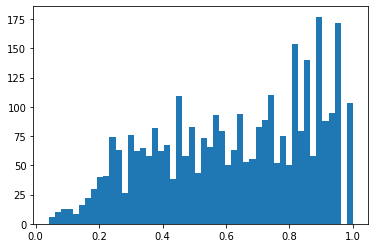

In [41]:
plt.hist(ratios_area, bins=50)

In [43]:
import pandas as pd
import geopandas as gpd
annotations = pd.read_pickle(
            f"data/szprotawa/szprotawa_patches_256//annotation.pkl").set_geometry("bbox")

In [51]:
annotations.bbox.apply(lambda x: x.area >0 and x.exterior.xy)

0       ([132.0, 162.0, 162.0, 132.0, 132.0], [152.0, ...
1       ([132.0, 162.0, 162.0, 132.0, 132.0], [24.0, 2...
2       ([135.0, 164.0, 164.0, 135.0, 135.0], [203.0, ...
3       ([135.0, 164.0, 164.0, 135.0, 135.0], [75.0, 7...
4       ([4.0, 34.0, 34.0, 4.0, 4.0], [152.0, 152.0, 1...
                              ...                        
7841    ([201.0, 256.0, 256.0, 201.0, 201.0], [27.0, 2...
7842    ([73.0, 177.0, 177.0, 73.0, 73.0], [155.0, 155...
7843    ([73.0, 177.0, 177.0, 73.0, 73.0], [27.0, 27.0...
7844    ([0.0, 49.0, 49.0, 0.0, 0.0], [176.86666666666...
7845    ([0.0, 49.0, 49.0, 0.0, 0.0], [48.866666666666...
Name: bbox, Length: 7846, dtype: object

In [54]:
b = annotations.bbox.iloc[1203]

In [62]:
b.boundary.xy

(array('d', [111.0, 139.0, 139.0, 111.0, 111.0]),
 array('d', [69.0, 69.0, 108.0, 108.0, 69.0]))